In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [11]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [19]:
quantiles = np.percentile(births['births'], [25,50,75])

In [20]:
mu, sigma = quantiles[1], (quantiles[2] - quantiles[0]) * 0.74

In [28]:
births = births.query('(births > @mu - 5* @sigma) & (births <@mu + 5 * @sigma)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000*births.year + 
                              100*births.month + births.day,
                             format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) 
                        for month, day in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


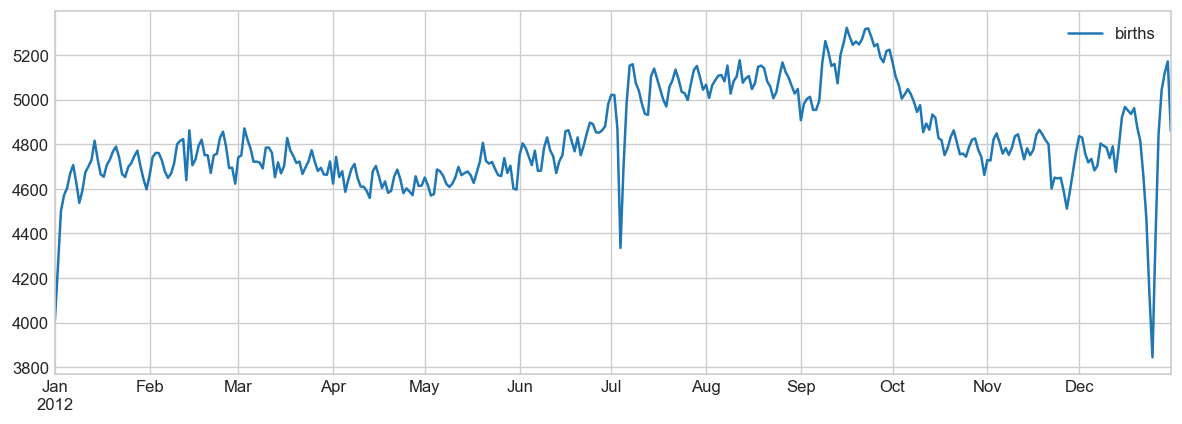

In [30]:
fig, ax = plt.subplots(figsize=(12,4))
fig.dpi = 120
births_by_date.plot(ax=ax)

### 通过`plt.text()/ax.text()`为图像增加注释

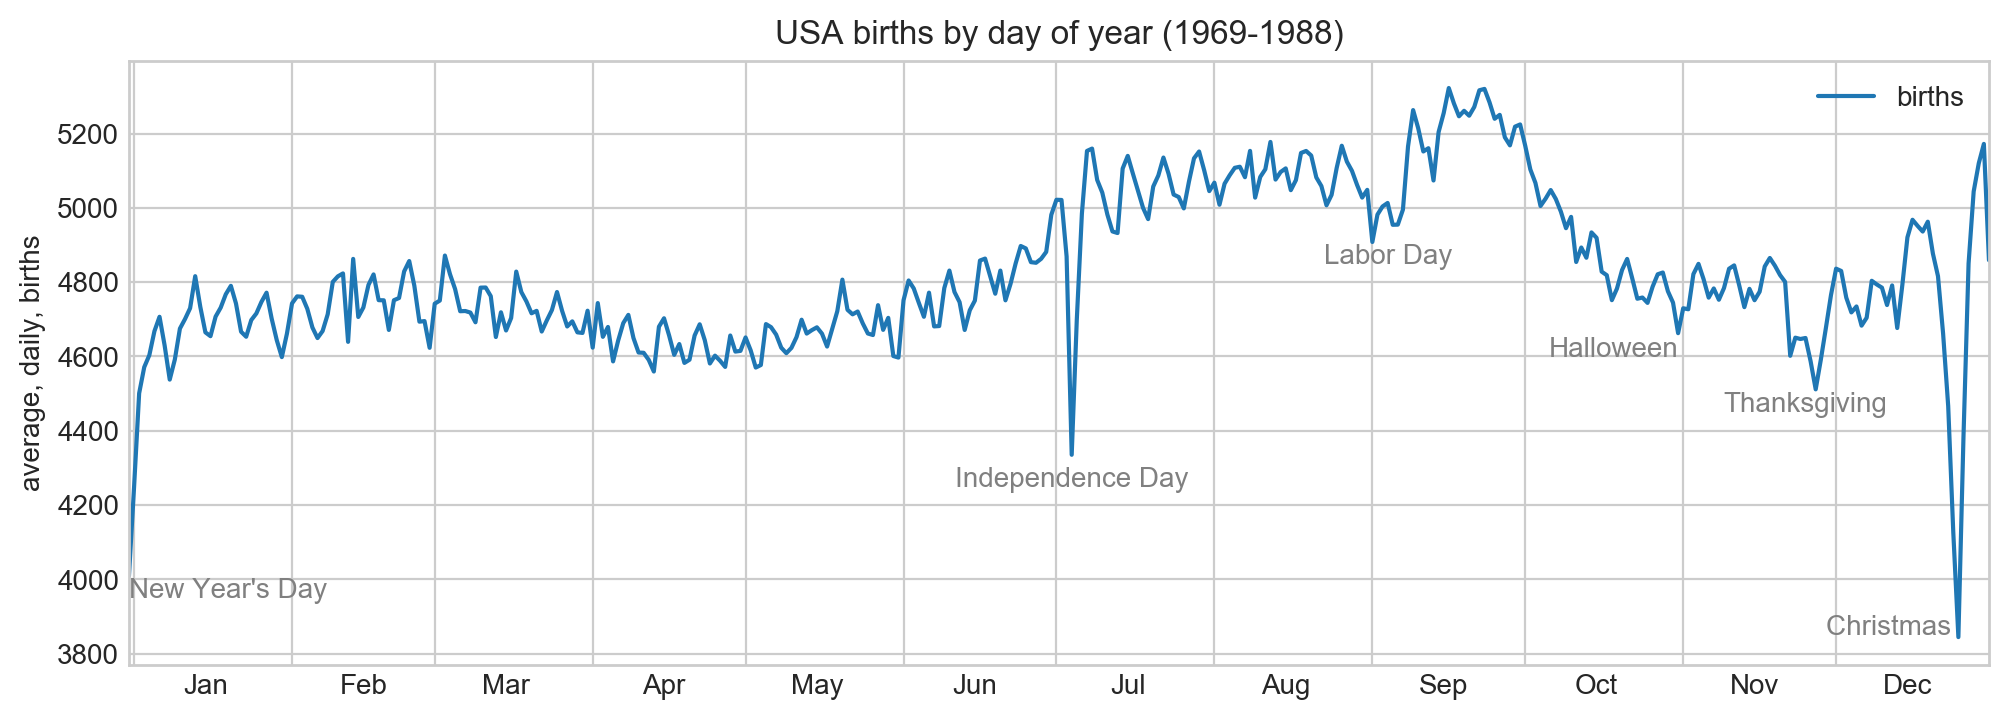

In [51]:
fig, ax = plt.subplots(figsize=(12,4))
fig.dpi = 200
births_by_date.plot(ax=ax)

# 在图上添加文字标签
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average, daily, births')

# 设置x轴刻度值， 让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

### 坐标变换与文字位置
+ ax.transData: 根据数据位置显示文字，默认值
+ ax.transAxes: 根据轴的位置显示文字。如:  
`ax.text(0.5,0.1,'. Axes: (0.5, 0.1)', transform=ax.transAxes)`在x轴的0.5,y轴的0.1
+ ax.transFigure: 以图形为基准的坐标变换(以图形维度为单位)

Text(0.2, 0.3, '. Figure: (0.2, 0.3)')

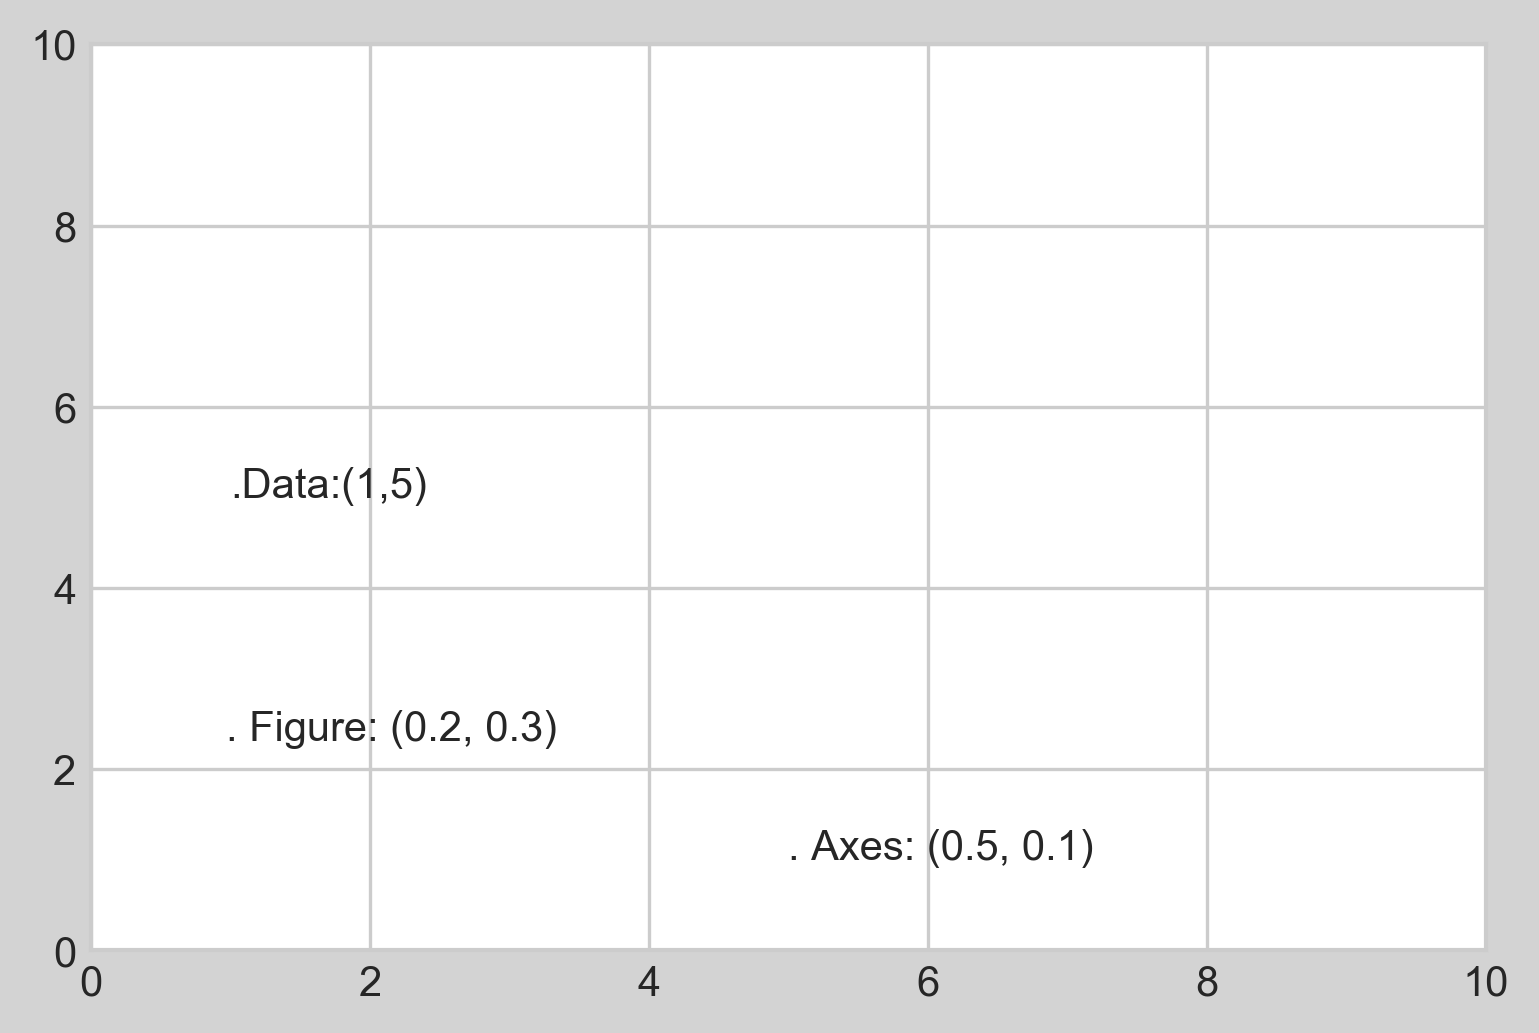

In [65]:
fig, ax = plt.subplots(facecolor='lightgray')
fig.dpi=300
# 设置坐标轴上下限
ax.axis([0,10,0,10])

ax.text(1, 5, '.Data:(1,5)', transform=ax.transData)
ax.text(0.5,0.1,'. Axes: (0.5, 0.1)', transform=ax.transAxes)
ax.text(0.2, 0.3, '. Figure: (0.2, 0.3)', transform=fig.transFigure)

如果更改坐标轴上下限，只有transdata受影响

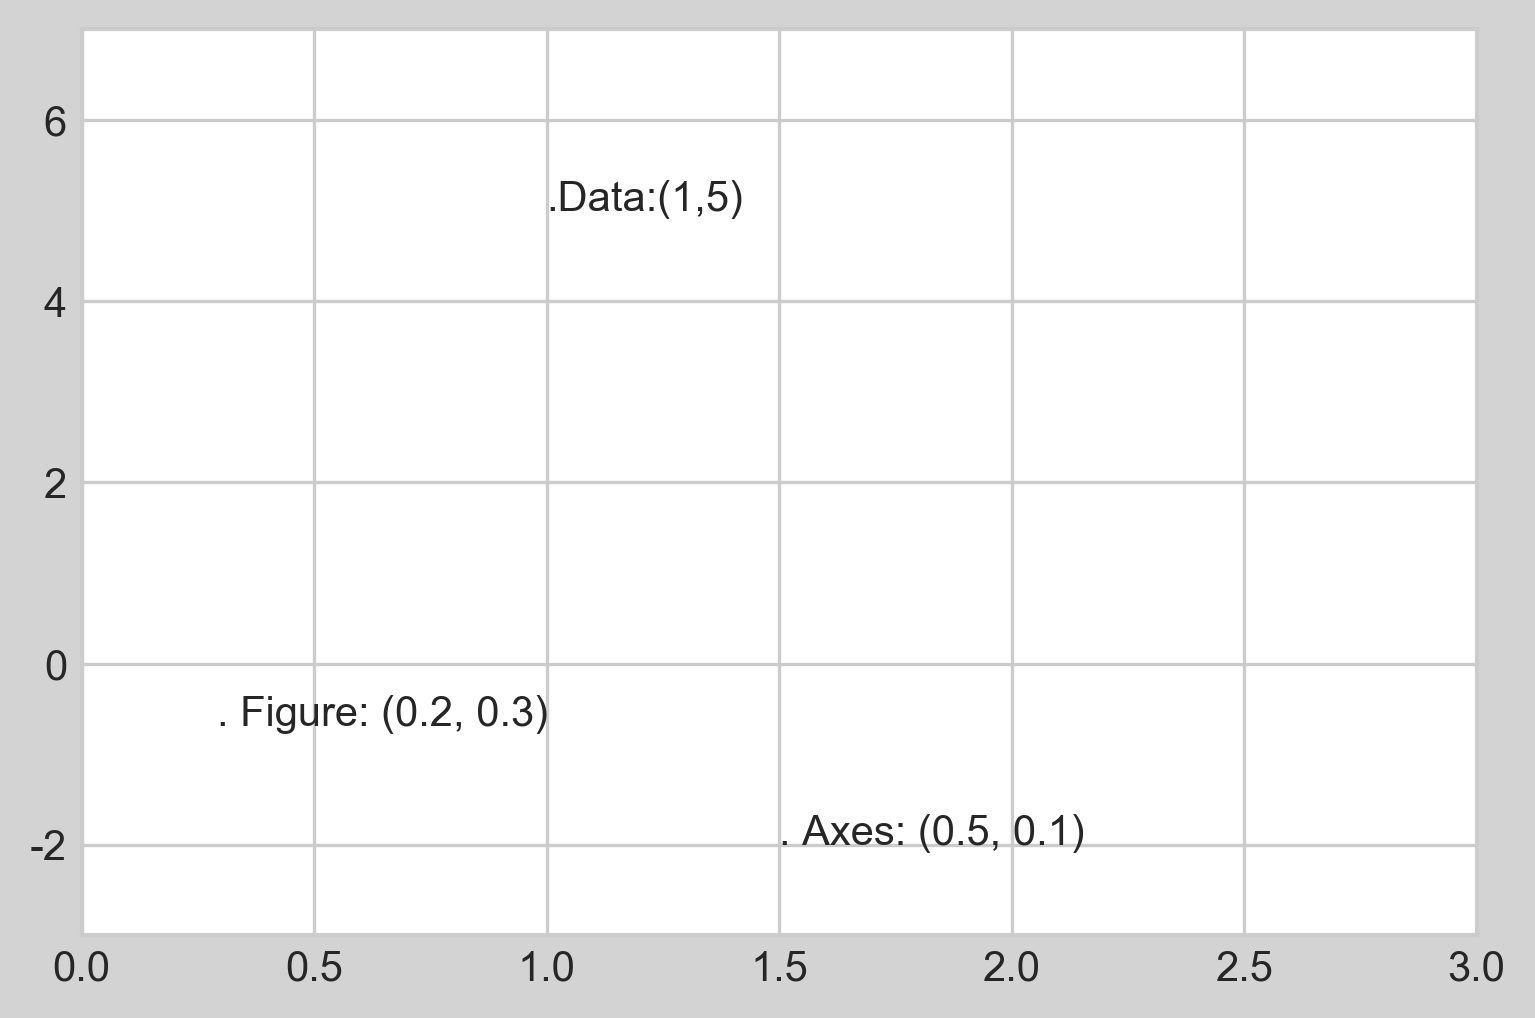

In [67]:
ax.set(xlim=(0,3), ylim=(-3,7))
fig

### 箭头与注释
`plt.annotate()`

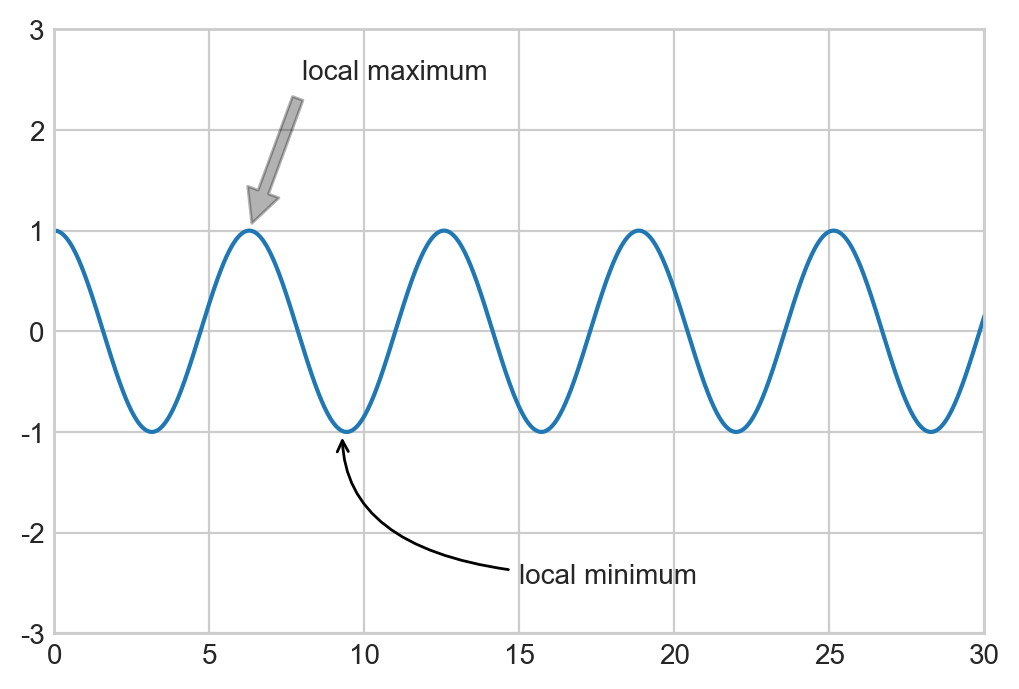

In [79]:
fig, ax = plt.subplots()
fig.dpi=200
x = np.linspace(0 ,30, 1000)
ax.plot(x, np.cos(x))
ax.axis([0, 30, -3, 3])

ax.annotate('local maximum', xy=(6.28, 1), xytext=(8, 2.5),
           arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.3))
ax.annotate('local minimum', xy=(9.28, -1), xytext=(15, -2.5),
           arrowprops=dict(arrowstyle='->', connectionstyle='angle3,angleA=0, angleB=90'))
plt.show()

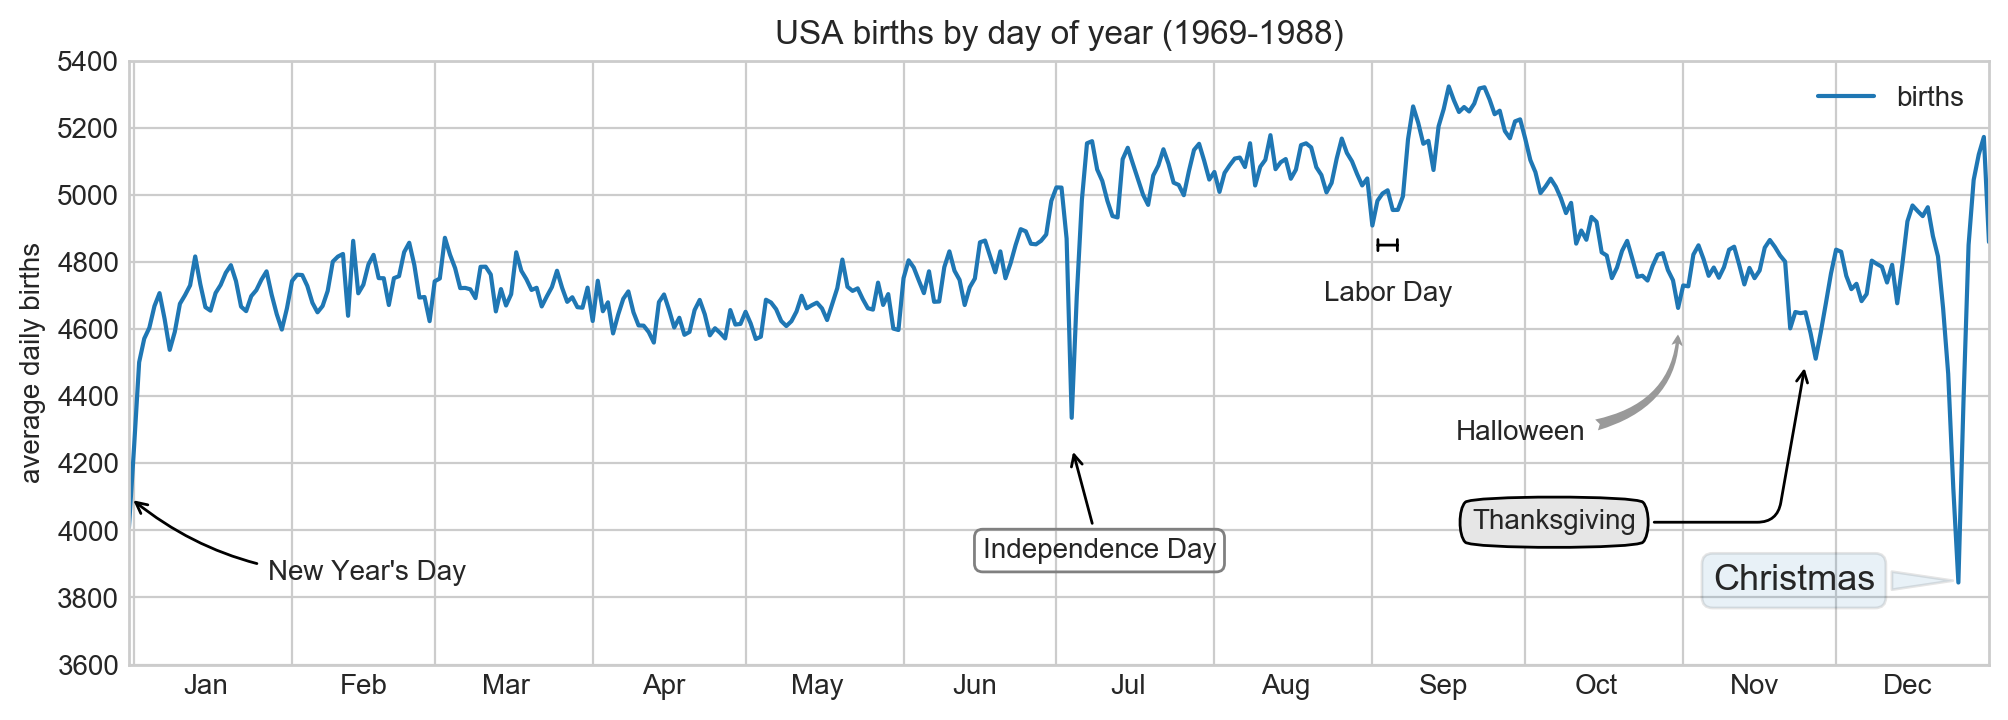

In [83]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.dpi=200
births_by_date.plot(ax=ax)

# 在图上增加箭头标签
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
xytext=(50, -30), textcoords='offset points',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
bbox=dict(boxstyle="round", fc="none", ec="gray"),
xytext=(10, -40), textcoords='offset points', ha='center',
arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
xycoords='data', textcoords='data',
arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
xytext=(-80, -40), textcoords='offset points',
arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
xytext=(-120, -60), textcoords='offset points',
bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
xytext=(-30, 0), textcoords='offset points',
size=13, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')
# 设置x轴刻度值， 让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);